In [1]:
# 基础数组运算库导入
import numpy as np 
# 画图库导入
import matplotlib.pyplot as plt 
# 导入三维显示工具
from mpl_toolkits.mplot3d import Axes3D
# 导入BP模型
from sklearn.neural_network import MLPClassifier
#如果是回归问题则使用MLPRegressor
# 导入demo数据制作方法
from sklearn.datasets.samples_generator import make_classification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 0.92, 'Demo Data Map')

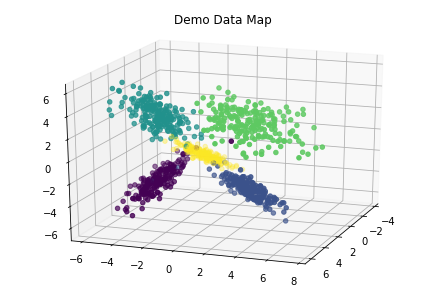

In [2]:
# 制作五个类别的数据，每个类别1000个样本
train_samples, train_labels = make_classification(n_samples=1000, n_features=3, n_redundant=0,
                           n_classes=5, n_informative=3, n_clusters_per_class=1,
                           class_sep=3, random_state=10)
# 将五个类别的数据进行三维显示
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)
ax.scatter(train_samples[:, 0], train_samples[:, 1], train_samples[:, 2], marker='o', c=train_labels)
plt.title('Demo Data Map')

In [ ]:
# 建立 BP 模型, 采用sgd优化器（sgd是梯度下降法），
#activation(激活函数）:relu非线性映射函数，还可以用逻辑回归等函数
BP = MLPClassifier(solver='sgd',activation = 'relu',max_iter = 500,alpha = 1e-3,hidden_layer_sizes = (32,32),random_state = 1)
#模型训练
BP.fit(train_samples, train_labels)

In [ ]:
# 进行模型预测
predict_labels = BP.predict(train_samples)
# 显示预测的散点图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20)
ax.scatter(train_samples[:, 0], train_samples[:, 1], train_samples[:, 2], marker='o', c=predict_labels)
plt.title('Demo Data Predict Map with BP Model')

# 显示预测分数
print("预测准确率: {:.4f}".format(BP.score(train_samples, train_labels)))
# 准确率等报表
print(classification_report(train_labels, predict_labels))

# 计算混淆矩阵
classes = [0, 1, 2, 3]
cofusion_mat = confusion_matrix(train_labels, predict_labels, classes) 
sns.set()
figur, ax = plt.subplots()
# 画热力图
sns.heatmap(cofusion_mat, cmap="YlGnBu_r", annot=True, ax=ax) 
ax.set_title('confusion matrix')  # 标题
ax.set_xticklabels([''] + classes, minor=True)
ax.set_yticklabels([''] + classes, minor=True)
ax.set_xlabel('predict')  # x轴
ax.set_ylabel('true')  # y轴
plt.show()

In [ ]:
#乳腺癌分类实践

In [4]:
# 导入乳腺癌数据集
from sklearn.datasets import load_breast_cancer
# 导入BP模型
from sklearn.neural_network import MLPClassifier
# 导入训练集分割方法
from sklearn.model_selection import train_test_split 
# 导入预测指标计算函数和混淆矩阵计算函数
from sklearn.metrics import classification_report, confusion_matrix
# 导入绘图包
import seaborn as sns
import matplotlib
# 导入乳腺癌数据集
cancer = load_breast_cancer()
# 查看数据集信息
print('breast_cancer数据集的长度为：',len(cancer))
print('breast_cancer数据集的类型为：',type(cancer))
# 分割数据为训练集和测试集
cancer_data = cancer['data']
print('cancer_data数据维度为：',cancer_data.shape)
cancer_target = cancer['target']
print('cancer_target标签维度为：',cancer_target.shape)
cancer_names = cancer['feature_names']
cancer_desc = cancer['DESCR']
#分为训练集与测试集
cancer_data_train,cancer_data_test = train_test_split(cancer_data,test_size=0.2,random_state=42)#训练集
cancer_target_train,cancer_target_test = train_test_split(cancer_target,test_size=0.2,random_state=42)#测试集

breast_cancer数据集的长度为： 7
breast_cancer数据集的类型为： <class 'sklearn.utils.Bunch'>
cancer_data数据维度为： (569, 30)
cancer_target标签维度为： (569,)


In [ ]:
# 建立 BP 模型, 采用Adam优化器，relu非线性映射函数
BP = MLPClassifier(solver='adam',activation = 'relu',max_iter = 1000,alpha = 1e-3,hidden_layer_sizes = (64,32, 32),random_state = 1)
# 进行模型训练
BP.fit(cancer_data_train, cancer_target_train)

In [ ]:
# 进行模型预测
predict_train_labels = BP.predict(cancer_data_train)
# 可视化真实数据
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20) 
ax.scatter(cancer_data_train[:, 0], cancer_data_train[:, 1], cancer_data_train[:, 2], marker='o', c=cancer_target_train)
plt.title('True Label Map')
plt.show()
# 可视化预测数据
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=20) 
ax.scatter(cancer_data_train[:, 0], cancer_data_train[:, 1], cancer_data_train[:, 2], marker='o', c=predict_train_labels)
plt.title('Cancer with BP Model')
plt.show()